### Instrucciones

El conjunto de datos a explorar es un set de datos de recaudaciones de
películas de cine. En el siguiente enlace se pueden obtener los datos, así
como el detalle del contenido de estos: Movie Industry | Kaggle 

* Quedan excluidas del desafío las variables: director, star y writer

#### Cuestiones planteadas

En la presentación se espera que des recomendaciones de qué tipo de
películas debería hacer una productora de cine que quiere maximizar el
beneficio de sus producciones. A modo de ejemplo, estas son algunas de las
preguntas que se puede plantear la compañía en este sentido:

• ¿En qué género debería enfocarme?

• ¿Qué tan importante es producir una buena película (rating IMDB alto)
para obtener muchos ingresos?

• ¿Es mejor producir una película para todos los públicos? ¿O una dirigida
sólo al público adulto?

• ...

In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Reading data

data = pd.DataFrame(pd.read_csv('../raw_data/movies.csv', encoding = 'iso-8859-1'))

In [3]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# Dropping director, star and writer
data = data.drop(columns =['director', 'star', 'writer'])



In [5]:
data.head()

,budget,company,country,genre,gross,name,rating,released,runtime,score,votes,year
0,8000000.0,Columbia Pictures Corporation,USA,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,299174,1986
1,6000000.0,Paramount Pictures,USA,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,264740,1986
2,15000000.0,Paramount Pictures,USA,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,236909,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,540152,1986
4,9000000.0,Walt Disney Pictures,USA,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,36636,1986


### Data Cleaning

In [6]:
#Checking for duplicates

len(data) # Check number of rows before removing duplicates
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

6820

In [7]:
# Checking for null values 

data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

budget      0.0
company     0.0
country     0.0
genre       0.0
gross       0.0
name        0.0
rating      0.0
released    0.0
runtime     0.0
score       0.0
votes       0.0
year        0.0
dtype: float64

/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

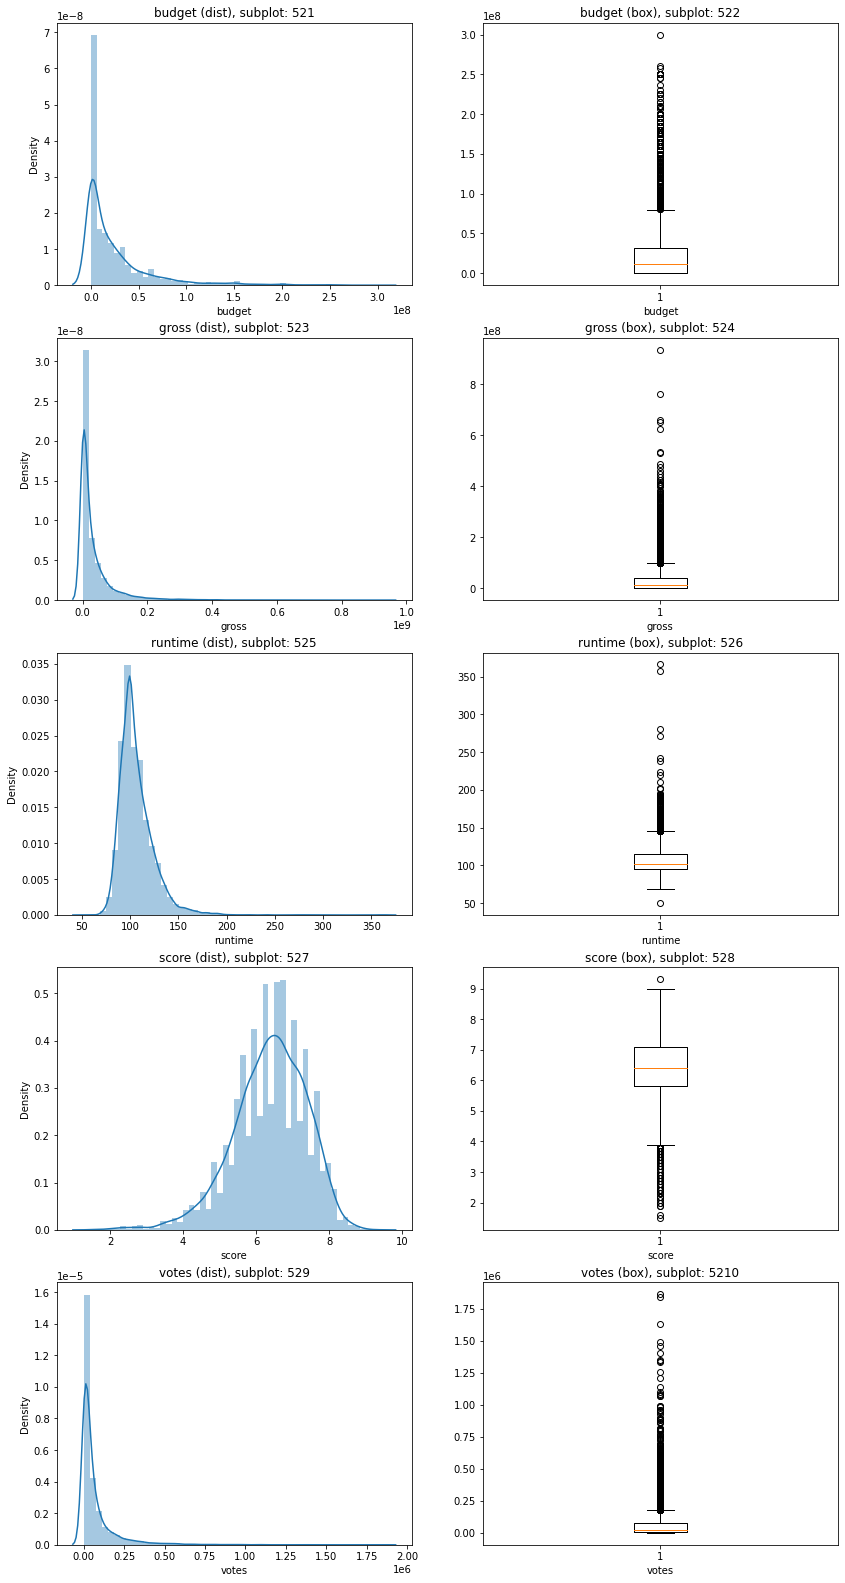

In [8]:
# Plotting and checking for false outliers

#  Numerical Data
data_NUM = ['budget', 'gross', 'runtime', 'score', 'votes']

#  plot Numerical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,28))

for i in data_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = data[i])
    c = c + 1

In [9]:
# Scaling numeric independent variables 

# Defining numeric independent variables
data_NUM_X = ['budget', 'runtime', 'score', 'votes']

scaler = MinMaxScaler() # Instanciate MinMaxScaler


for i in data_NUM_X:
    scaler.fit(data[[i]]) # Fit scaler to data
    data[i] = scaler.transform(data[[i]]) # Use scaler to transform data
    



### Feature Engineering

In [10]:
# Checking number of unique values for categorical variables

data_CAT = ['company', 'country', 'genre', 'rating']
for i in data_CAT:
    print(f'{i} has {data[i].nunique()} unique values.')


company has 2179 unique values.
country has 57 unique values.
genre has 17 unique values.
rating has 13 unique values.


In [11]:
# Encoding Genre 

genre_encoding = pd.DataFrame(data[['genre']])
genre_encoding = pd.get_dummies(genre_encoding)

# Encoding Rating

rating_encoding = pd.DataFrame(data[['rating']])
rating_encoding = pd.get_dummies(rating_encoding)

# Adding encoded Genre and Rating columns to data

# data = data.join(genre_rating_encoding)

In [12]:
rating_encoding

,rating_B,rating_B15,rating_G,rating_NC-17,rating_NOT RATED,rating_Not specified,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_UNRATED
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,0,0,0,0,0,0,0,1,0,0,0,0
6816,0,0,0,0,0,0,0,1,0,0,0,0,0
6817,0,0,0,0,0,0,0,0,1,0,0,0,0
6818,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
# Create adult_movie column

def adult_rated(row):
    if row['rating'] == 'R':
        return 1
    elif row['rating'] == 'NC-17':
        return 1
    elif row['rating'] == 'TV-MA':
        return 1
    else:
        return 0 

data['adult_movie'] = data.apply (lambda row: adult_rated(row), axis=1)  

In [14]:
# Create adult_movie column

# def adult_rated(row):
#     if row['rating_R'] == 1:
#         return 1
#     elif row['rating_NC-17'] == 1:
#         return 1
#     elif row['rating_TV-MA'] == 1:
#         return 1
#     else:
#         return 0

# data['adult_movie'] = data.apply (lambda row: adult_rated(row), axis=1)    

In [15]:
# Encoding company

company_encoding = pd.DataFrame(data[['company']])

# Creating list with 25 most frequent companies

company_encoding.company.value_counts().sort_values(ascending=False).head(25)
top_25_companies = [x for x in company_encoding.company.value_counts().sort_values(ascending=False).head(25).index]

# Creating binary columns for top 25 companies
for i in top_25_companies:
    company_encoding[i] = np.where(company_encoding.company == i, 1, 0)

In [16]:
# Creating list with 25 most frequent companies

# data.company.value_counts().sort_values(ascending=False).head(25)
# top_25_companies = [x for x in data.company.value_counts().sort_values(ascending=False).head(25).index]

# # Creating binary columns for top 25 companies
# for i in top_25_companies:
#     data[i] = np.where(data.company == i, 1, 0)


In [17]:
# Encoding countries

country_encoding = pd.DataFrame(data[['country']])

# Creating list with 15 most frequent countries

country_encoding.country.value_counts().sort_values(ascending=False).head(15)
top_15_countries = [x for x in country_encoding.country.value_counts().sort_values(ascending=False).head(15).index]

# Creating binary columns for top 15 countries
for i in top_15_countries:
    country_encoding[i] = np.where(country_encoding.country == i, 1, 0)

In [18]:
# # Creating list with 15 most frequent countries

# data.country.value_counts().sort_values(ascending=False).head(15)
# top_15_countries = [x for x in data.country.value_counts().sort_values(ascending=False).head(15).index]

# # Creating binary columns for top 15 countries
# for i in top_15_countries:
#     data[i] = np.where(data.country == i, 1, 0)

### Feature Selection

In [19]:
# Evaluating Pearson Correlation between features

corr = data.corr() # Create correlation matrix
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(20)

,feature_1,feature_2,correlation
7,gross,budget,0.712196
1,budget,gross,0.712196
29,votes,gross,0.662457
11,gross,votes,0.662457
28,votes,budget,0.503924
4,budget,votes,0.503924
23,score,runtime,0.395343
17,runtime,score,0.395343
31,votes,score,0.393607
25,score,votes,0.393607


In [20]:
corr_df.tail(20)

,feature_1,feature_2,correlation
22,score,gross,0.165693
10,gross,score,0.165693
26,score,year,0.105276
38,year,score,0.105276
19,runtime,year,0.087639
37,year,runtime,0.087639
45,adult_movie,score,0.079061
27,score,adult_movie,0.079061
3,budget,score,0.042145
21,score,budget,0.042145


### Modeling

In [22]:
# Baseline Model 

y = data['gross']
X = data.drop(columns= ['gross', 'company', 'country', 'genre', 'name', 'rating', 'released', 'year'])

lr_model = LinearRegression()
scores = cross_val_score(lr_model, X, y, cv=10) # Cross validate
scores.mean()

0.5711879754095899

### ¿En qué género debería enfocarme?


In [28]:
from sklearn.model_selection import cross_validate


# 10-Fold Cross validate model
cv_results = cross_validate(lr_model, genre_encoding, y, cv=10)

# Scores
cv_results['test_score'].mean()


#REPASAR LINEAR REGRESSION, CORRELATIONS, CUAL ES LA MEJOR FORMA DE CONTESTAR ESTO?


-2.9930559067590933e+23

### ¿Qué tan importante es producir una buena película (rating IMDB alto) para obtener muchos ingresos?

### ¿Es mejor producir una película para todos los públicos? ¿O una dirigida sólo al público adulto?

### ...